In [4]:
# Import Packages
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Exploratory Data Analysis

In [5]:
# Assume tar.gz file to be extracted at project directory.
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [6]:
# read the datasets
data_batch_train = unpickle("data_batch_1")
data_batch_test = unpickle("test_batch")

In [7]:
# dataset information
print(data_batch_train.keys())
for item in data_batch_train:
    print(item, type(data_batch_train[item]))

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
b'batch_label' <class 'bytes'>
b'labels' <class 'list'>
b'data' <class 'numpy.ndarray'>
b'filenames' <class 'list'>


In [8]:
# Dataset Reshape And Transpose Function

def reshape_dataset(input_dataset):
    input_dataset = input_dataset.reshape(len(input_dataset),3,32,32)
    input_dataset = input_dataset.transpose(0,2,3,1)
    return input_dataset
    

In [9]:
# use the function above to Reshape and Transpose datasets

X_train = data_batch_train[b'data']
print("X_train shape before reshape:", X_train.shape)
# Reshape the whole image data
X_train = reshape_dataset(X_train)
print("X_train shape after reshape and transpose:", X_train.shape)
Y_train = data_batch_train[b'labels']

X_train shape before reshape: (10000, 3072)
X_train shape after reshape and transpose: (10000, 32, 32, 3)


# Plot 5 images from each label 

In [10]:
# load meta file to get the label name
meta_file = 'batches.meta'
meta_data = unpickle(meta_file)
print("Label Names:", meta_data[b'label_names'] )

Label Names: [b'airplane', b'automobile', b'bird', b'cat', b'deer', b'dog', b'frog', b'horse', b'ship', b'truck']


In [11]:
import matplotlib.pyplot as plt
import numpy as np
# take the images data from batch data
images = data_batch_train[b'data']
# reshape and transpose the images
images = images.reshape(len(images),3,32,32).transpose(0,2,3,1)
# take labels of the images 
labels = data_batch_train[b'labels']
# label names of the images
label_names = meta_data[b'label_names']

In [12]:
# Select 5 images from each label
values,counts = np.unique(labels, return_counts=True)
index_list = []
for i in range(0,len(values)):
    count = 0
    index = 0
    while count < 5:
        if labels[index] == i:
            index_list += [index]
            count +=1
            index +=1
            
        else:
            index +=1
images = images[index_list]
# take labels for these images only
labels = [labels[i] for i in index_list]   

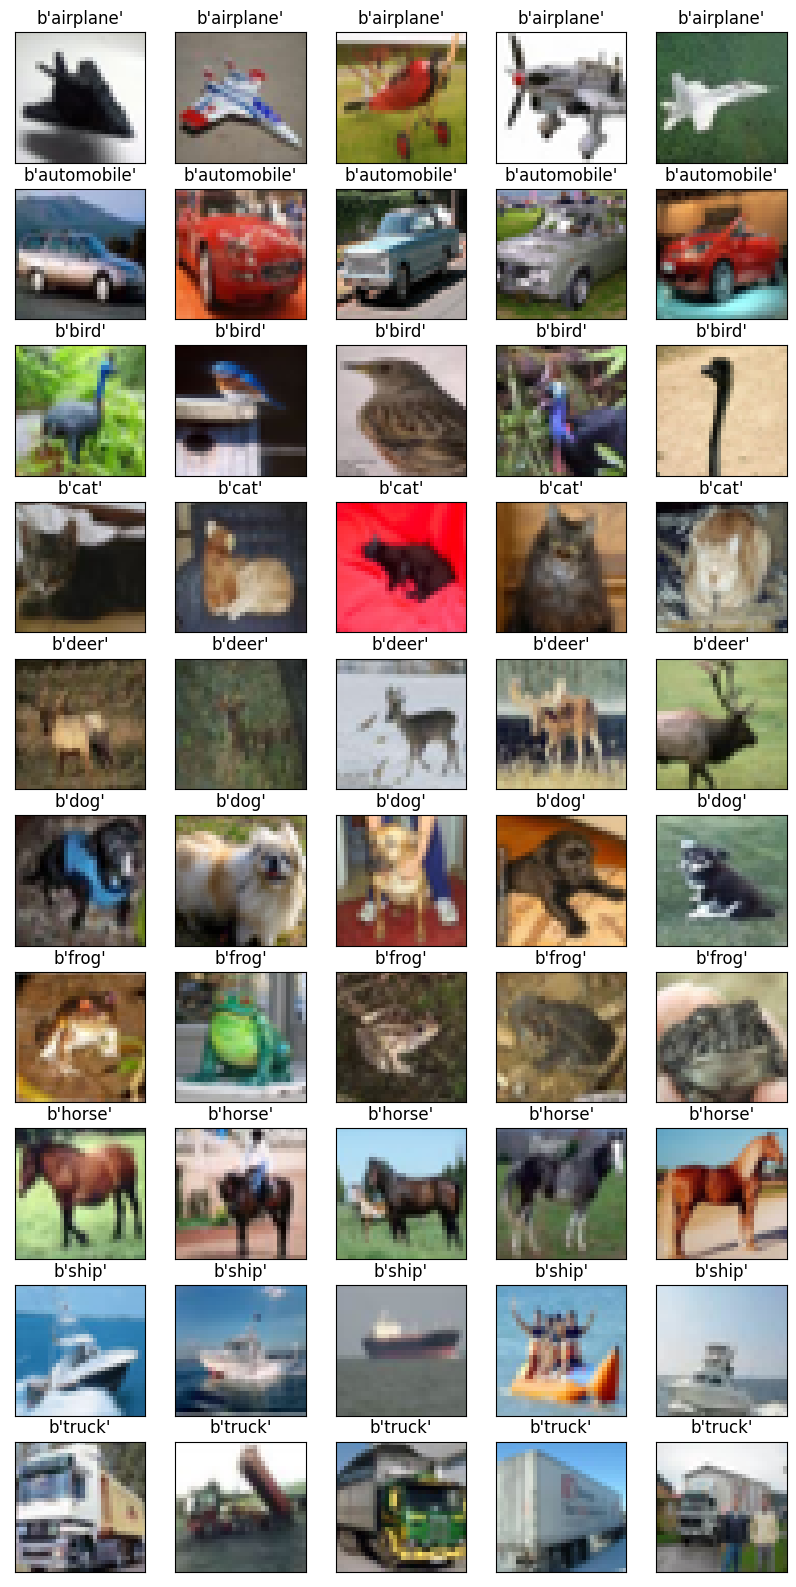

In [13]:
#define figure

columns = 5
rows = len(values)
fig=plt.figure(figsize=(10, 20))
# visualize these random images
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(images[i-1])
    plt.xticks([])
    plt.yticks([])
    plt.title("{}"
          .format(label_names[labels[i-1]]))
plt.show()

# Data Processing
In the following section, I will pick the first label: 'Airplane' to do the classification

In [14]:
def find_indices(list_to_check, item_to_find):
    indices = []
    for idx, value in enumerate(list_to_check):
        if value == item_to_find:
            indices.append(idx)
    return indices

index_list = find_indices(data_batch_test[b'labels'], 0)

In [15]:
def label_set(dic_input):
    dic_input['label_airplane'] = []
    value_list = dic_input[b'labels']
    for i in range(len(dic_input[b'labels'])):
        if value_list[i] == 0:
            dic_input['label_airplane'] =  dic_input['label_airplane'] + [1]            
        else:
            dic_input['label_airplane'] = dic_input['label_airplane'] + [0]
            
    return dic_input

In [16]:
# reshape the testset first

X_test = data_batch_test[b'data']
print("Shape before reshape:", X_test.shape)
X_test = reshape_dataset(X_test)
print("Shape after reshape and transpose:", X_test.shape)

Shape before reshape: (10000, 3072)
Shape after reshape and transpose: (10000, 32, 32, 3)


In [17]:
label_set(data_batch_train) 
label_set(data_batch_test)

import random
while len(index_list) < 2000:
    value= random.randrange(0, 10000)
    if value not in index_list:
        index_list = np.append(index_list,value)

Y_train = np.array(data_batch_train['label_airplane'])
Y_test = np.array(data_batch_test['label_airplane'])
Y_test_sample = Y_test[index_list] 
X_test_sample = X_test[[index_list], :] [0]

# Shape of training and testing sets

In [18]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test_sample.shape)
print("Shape of X_test: ", Y_test_sample.shape)

Shape of X_train:  (10000, 32, 32, 3)
Shape of Y_train:  (10000,)
Shape of X_test:  (2000, 32, 32, 3)
Shape of X_test:  (2000,)


In [19]:
# check the selected testing set is balanced
values,counts = np.unique(Y_test_sample, return_counts=True)
values,counts

(array([0, 1]), array([1000, 1000]))

In [20]:
# convert from integers to floats; normalize to range 0-1

X_train = X_train.astype("float32") / 255                                     
X_test = X_test.astype("float32") / 255

# Data Modelling

In [21]:
cifar10_model=tf.keras.models.Sequential()
# First Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", input_shape=[32,32,3]))
# Second Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu"))
# Max Pooling Layer
cifar10_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))
# Third Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))
cifar10_model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))
cifar10_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))
cifar10_model.add(tf.keras.layers.Flatten())
cifar10_model.add(tf.keras.layers.Dropout(0.5,noise_shape=None,seed=None))
cifar10_model.add(tf.keras.layers.Dense(units=128,activation='relu'))
cifar10_model.add(tf.keras.layers.Dense(units=10,activation='relu'))
cifar10_model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

Metal device set to: Apple M1 Pro


2022-09-10 15:02:17.313387: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-10 15:02:17.313704: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [22]:
cifar10_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

# Hyperparameter tuning 

In [23]:
# There are three hyperparameters: num_units, dropout, optimizer
from tensorflow.keras import Input, layers, Sequential, optimizers, losses, callbacks
from datetime import datetime

from tensorboard.plugins.hparams import api as hp
HP_NUM_UNITS = hp.HParam('num_units', hp.Discrete([64, 128]))
HP_DROPOUT = hp.HParam('dropout', hp.RealInterval(0.1,0.5))
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam', 'sgd']))
METRIC_ACCURACY = 'binary_accuracy'

with tf.summary.create_file_writer('logs/hparam_tuning').as_default():
  hp.hparams_config(
    hparams=[HP_NUM_UNITS, HP_DROPOUT, HP_OPTIMIZER],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
  )

In [24]:
def train_test_model(hparams):
    cifar10_model_HP=tf.keras.models.Sequential()
    # First Layer
    cifar10_model_HP.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", input_shape=[32,32,3]))
    # Second Layer
    cifar10_model_HP.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu"))
    # Max Pooling Layer
    cifar10_model_HP.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))
    # Third Layer
    cifar10_model_HP.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))
    cifar10_model_HP.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))
    cifar10_model_HP.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))
    cifar10_model_HP.add(tf.keras.layers.Flatten())
    cifar10_model_HP.add(tf.keras.layers.Dropout(hparams[HP_DROPOUT],noise_shape=None,seed=None))
    cifar10_model_HP.add(tf.keras.layers.Dense(hparams[HP_NUM_UNITS],activation='relu'))
    cifar10_model_HP.add(tf.keras.layers.Dense(units=10,activation='relu'))
    cifar10_model_HP.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

    log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")

    # Callbacks for QoL.
    tensorboard_callback = callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
    earlystop_callback = callbacks.EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)
    cifar10_model_HP.compile(
          optimizer=hparams[HP_OPTIMIZER],
          loss='binary_crossentropy',
          metrics=['binary_accuracy'],
      )

    cifar10_model_HP.fit(X_train, Y_train,
    validation_split=0.33,
    epochs=15,
    batch_size=1000, # Set this to a lower number if your computer spec is bad.
    callbacks=[tensorboard_callback, earlystop_callback],)
    _, accuracy = cifar10_model_HP.evaluate(X_test_sample, Y_test_sample)
    return accuracy

In [25]:
def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    accuracy = train_test_model(hparams)
    tf.summary.scalar(METRIC_ACCURACY, accuracy, step=15)

In [26]:
session_num = 0

for num_units in HP_NUM_UNITS.domain.values:
  for dropout_rate in (HP_DROPOUT.domain.min_value, HP_DROPOUT.domain.max_value):
    for optimizer in HP_OPTIMIZER.domain.values:
      hparams = {
          HP_NUM_UNITS: num_units,
          HP_DROPOUT: dropout_rate,
          HP_OPTIMIZER: optimizer,
      }
      run_name = "run-%d" % session_num
      print('--- Starting trial: %s' % run_name)
      print({h.name: hparams[h] for h in hparams})
      run('logs/hparam_tuning/' + run_name, hparams)
      session_num += 1

--- Starting trial: run-0
{'num_units': 64, 'dropout': 0.1, 'optimizer': 'adam'}
Epoch 1/15


2022-09-10 15:02:21.559022: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-09-10 15:02:21.832676: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - ETA: 0s - loss: 0.4877 - binary_accuracy: 0.7822

2022-09-10 15:02:23.361390: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 2s 206ms/step - loss: 0.4877 - binary_accuracy: 0.7822 - val_loss: 0.3553 - val_binary_accuracy: 0.8994
Epoch 2/15
7/7 [==============================] - 1s 116ms/step - loss: 0.3545 - binary_accuracy: 0.8995 - val_loss: 0.3449 - val_binary_accuracy: 0.8994
Epoch 3/15
7/7 [==============================] - 1s 116ms/step - loss: 0.3244 - binary_accuracy: 0.8995 - val_loss: 0.2986 - val_binary_accuracy: 0.8994
Epoch 4/15
7/7 [==============================] - 1s 115ms/step - loss: 0.2916 - binary_accuracy: 0.8995 - val_loss: 0.2913 - val_binary_accuracy: 0.8994
Epoch 5/15
7/7 [==============================] - 1s 112ms/step - loss: 0.2789 - binary_accuracy: 0.8995 - val_loss: 0.2844 - val_binary_accuracy: 0.8994
Epoch 6/15
7/7 [==============================] - 1s 119ms/step - loss: 0.2709 - binary_accuracy: 0.8995 - val_loss: 0.2748 - val_binary_accuracy: 0.8994
Epoch 7/15
7/7 [==============================] - 1s 119ms/step - loss: 0.2623 - binary

2022-09-10 15:02:34.624701: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 0s 5ms/step - loss: 28.2646 - binary_accuracy: 0.7535
--- Starting trial: run-1
{'num_units': 64, 'dropout': 0.1, 'optimizer': 'sgd'}
Epoch 1/15
1/7 [===>..........................] - ETA: 3s - loss: 0.7309 - binary_accuracy: 0.0990

2022-09-10 15:02:35.520714: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - ETA: 0s - loss: 0.6693 - binary_accuracy: 0.6632

2022-09-10 15:02:36.389112: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 148ms/step - loss: 0.6693 - binary_accuracy: 0.6632 - val_loss: 0.5950 - val_binary_accuracy: 0.8994
Epoch 2/15
7/7 [==============================] - 1s 111ms/step - loss: 0.5525 - binary_accuracy: 0.8995 - val_loss: 0.4751 - val_binary_accuracy: 0.8994
Epoch 3/15
7/7 [==============================] - 1s 124ms/step - loss: 0.4340 - binary_accuracy: 0.8995 - val_loss: 0.3798 - val_binary_accuracy: 0.8994
Epoch 4/15
7/7 [==============================] - 1s 112ms/step - loss: 0.3699 - binary_accuracy: 0.8995 - val_loss: 0.3578 - val_binary_accuracy: 0.8994
Epoch 5/15
7/7 [==============================] - 1s 113ms/step - loss: 0.3575 - binary_accuracy: 0.8995 - val_loss: 0.3551 - val_binary_accuracy: 0.8994
Epoch 6/15
7/7 [==============================] - 1s 114ms/step - loss: 0.3555 - binary_accuracy: 0.8995 - val_loss: 0.3538 - val_binary_accuracy: 0.8994
Epoch 7/15
7/7 [==============================] - 1s 112ms/step - loss: 0.3540 - binary

2022-09-10 15:02:47.467032: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 0s 5ms/step - loss: 192.3989 - binary_accuracy: 0.5000
--- Starting trial: run-2
{'num_units': 64, 'dropout': 0.5, 'optimizer': 'adam'}
Epoch 1/15


2022-09-10 15:02:48.190978: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - ETA: 0s - loss: 0.5056 - binary_accuracy: 0.7894

2022-09-10 15:02:49.085080: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 144ms/step - loss: 0.5056 - binary_accuracy: 0.7894 - val_loss: 0.3662 - val_binary_accuracy: 0.8994
Epoch 2/15
7/7 [==============================] - 1s 110ms/step - loss: 0.3559 - binary_accuracy: 0.8995 - val_loss: 0.3430 - val_binary_accuracy: 0.8994
Epoch 3/15
7/7 [==============================] - 1s 114ms/step - loss: 0.3324 - binary_accuracy: 0.8995 - val_loss: 0.3091 - val_binary_accuracy: 0.8994
Epoch 4/15
7/7 [==============================] - 1s 121ms/step - loss: 0.2935 - binary_accuracy: 0.8995 - val_loss: 0.2819 - val_binary_accuracy: 0.8994
Epoch 5/15
7/7 [==============================] - 1s 118ms/step - loss: 0.2807 - binary_accuracy: 0.8995 - val_loss: 0.2800 - val_binary_accuracy: 0.8994
Epoch 6/15
7/7 [==============================] - 1s 115ms/step - loss: 0.2762 - binary_accuracy: 0.8995 - val_loss: 0.2740 - val_binary_accuracy: 0.8994
Epoch 7/15
7/7 [==============================] - 1s 120ms/step - loss: 0.2650 - binary

2022-09-10 15:03:00.230783: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 0s 5ms/step - loss: 27.9985 - binary_accuracy: 0.7590
--- Starting trial: run-3
{'num_units': 64, 'dropout': 0.5, 'optimizer': 'sgd'}
Epoch 1/15


2022-09-10 15:03:00.916143: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - ETA: 0s - loss: 0.6984 - binary_accuracy: 0.4822

2022-09-10 15:03:01.835427: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 152ms/step - loss: 0.6984 - binary_accuracy: 0.4822 - val_loss: 0.6228 - val_binary_accuracy: 0.8994
Epoch 2/15
7/7 [==============================] - 1s 113ms/step - loss: 0.6069 - binary_accuracy: 0.8961 - val_loss: 0.5328 - val_binary_accuracy: 0.8994
Epoch 3/15
7/7 [==============================] - 1s 111ms/step - loss: 0.5052 - binary_accuracy: 0.8995 - val_loss: 0.4231 - val_binary_accuracy: 0.8994
Epoch 4/15
7/7 [==============================] - 1s 110ms/step - loss: 0.4053 - binary_accuracy: 0.8995 - val_loss: 0.3621 - val_binary_accuracy: 0.8994
Epoch 5/15
7/7 [==============================] - 1s 111ms/step - loss: 0.3624 - binary_accuracy: 0.8995 - val_loss: 0.3547 - val_binary_accuracy: 0.8994
Epoch 6/15
7/7 [==============================] - 1s 111ms/step - loss: 0.3574 - binary_accuracy: 0.8995 - val_loss: 0.3537 - val_binary_accuracy: 0.8994
Epoch 7/15
7/7 [==============================] - 1s 111ms/step - loss: 0.3560 - binary

2022-09-10 15:03:12.738759: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 0s 5ms/step - loss: 194.6093 - binary_accuracy: 0.5000
--- Starting trial: run-4
{'num_units': 128, 'dropout': 0.1, 'optimizer': 'adam'}
Epoch 1/15


2022-09-10 15:03:13.729970: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - ETA: 0s - loss: 0.5082 - binary_accuracy: 0.7835

2022-09-10 15:03:14.646288: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 2s 158ms/step - loss: 0.5082 - binary_accuracy: 0.7835 - val_loss: 0.3601 - val_binary_accuracy: 0.8994
Epoch 2/15
7/7 [==============================] - 1s 115ms/step - loss: 0.3602 - binary_accuracy: 0.8995 - val_loss: 0.3358 - val_binary_accuracy: 0.8994
Epoch 3/15
7/7 [==============================] - 1s 114ms/step - loss: 0.3202 - binary_accuracy: 0.8995 - val_loss: 0.2960 - val_binary_accuracy: 0.8994
Epoch 4/15
7/7 [==============================] - 1s 122ms/step - loss: 0.2825 - binary_accuracy: 0.8995 - val_loss: 0.2845 - val_binary_accuracy: 0.8994
Epoch 5/15
7/7 [==============================] - 1s 115ms/step - loss: 0.2779 - binary_accuracy: 0.8995 - val_loss: 0.2781 - val_binary_accuracy: 0.8994
Epoch 6/15
7/7 [==============================] - 1s 115ms/step - loss: 0.2691 - binary_accuracy: 0.8995 - val_loss: 0.2728 - val_binary_accuracy: 0.8994
Epoch 7/15
7/7 [==============================] - 1s 113ms/step - loss: 0.2611 - binary

2022-09-10 15:03:25.901848: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 0s 5ms/step - loss: 28.7126 - binary_accuracy: 0.7310
--- Starting trial: run-5
{'num_units': 128, 'dropout': 0.1, 'optimizer': 'sgd'}
Epoch 1/15


2022-09-10 15:03:26.612966: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - ETA: 0s - loss: 0.6731 - binary_accuracy: 0.7180

2022-09-10 15:03:27.514988: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 153ms/step - loss: 0.6731 - binary_accuracy: 0.7180 - val_loss: 0.6359 - val_binary_accuracy: 0.8994
Epoch 2/15
7/7 [==============================] - 1s 121ms/step - loss: 0.6171 - binary_accuracy: 0.8995 - val_loss: 0.5826 - val_binary_accuracy: 0.8994
Epoch 3/15
7/7 [==============================] - 1s 113ms/step - loss: 0.5565 - binary_accuracy: 0.8995 - val_loss: 0.5071 - val_binary_accuracy: 0.8994
Epoch 4/15
7/7 [==============================] - 1s 112ms/step - loss: 0.4732 - binary_accuracy: 0.8995 - val_loss: 0.4183 - val_binary_accuracy: 0.8994
Epoch 5/15
7/7 [==============================] - 1s 113ms/step - loss: 0.3969 - binary_accuracy: 0.8995 - val_loss: 0.3696 - val_binary_accuracy: 0.8994
Epoch 6/15
7/7 [==============================] - 1s 113ms/step - loss: 0.3663 - binary_accuracy: 0.8995 - val_loss: 0.3590 - val_binary_accuracy: 0.8994
Epoch 7/15
7/7 [==============================] - 1s 112ms/step - loss: 0.3596 - binary

2022-09-10 15:03:38.595630: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 1s 6ms/step - loss: 216.9683 - binary_accuracy: 0.5000
--- Starting trial: run-6
{'num_units': 128, 'dropout': 0.5, 'optimizer': 'adam'}
Epoch 1/15


2022-09-10 15:03:39.384631: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - ETA: 0s - loss: 0.4985 - binary_accuracy: 0.7941

2022-09-10 15:03:40.386660: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 2s 163ms/step - loss: 0.4985 - binary_accuracy: 0.7941 - val_loss: 0.3580 - val_binary_accuracy: 0.8994
Epoch 2/15
7/7 [==============================] - 1s 121ms/step - loss: 0.3661 - binary_accuracy: 0.8995 - val_loss: 0.3482 - val_binary_accuracy: 0.8994
Epoch 3/15
7/7 [==============================] - 1s 113ms/step - loss: 0.3235 - binary_accuracy: 0.8995 - val_loss: 0.3014 - val_binary_accuracy: 0.8994
Epoch 4/15
7/7 [==============================] - 1s 113ms/step - loss: 0.2874 - binary_accuracy: 0.8995 - val_loss: 0.2826 - val_binary_accuracy: 0.8994
Epoch 5/15
7/7 [==============================] - 1s 113ms/step - loss: 0.2752 - binary_accuracy: 0.8995 - val_loss: 0.2771 - val_binary_accuracy: 0.8994
Epoch 6/15
7/7 [==============================] - 1s 112ms/step - loss: 0.2638 - binary_accuracy: 0.8995 - val_loss: 0.2636 - val_binary_accuracy: 0.8994
Epoch 7/15
7/7 [==============================] - 1s 112ms/step - loss: 0.2542 - binary

2022-09-10 15:03:51.533083: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 0s 5ms/step - loss: 32.2798 - binary_accuracy: 0.7470
--- Starting trial: run-7
{'num_units': 128, 'dropout': 0.5, 'optimizer': 'sgd'}
Epoch 1/15


2022-09-10 15:03:52.497511: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - ETA: 0s - loss: 0.6848 - binary_accuracy: 0.6313

2022-09-10 15:03:53.427768: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 156ms/step - loss: 0.6848 - binary_accuracy: 0.6313 - val_loss: 0.6445 - val_binary_accuracy: 0.8994
Epoch 2/15
7/7 [==============================] - 1s 116ms/step - loss: 0.6315 - binary_accuracy: 0.8982 - val_loss: 0.6011 - val_binary_accuracy: 0.8994
Epoch 3/15
7/7 [==============================] - 1s 112ms/step - loss: 0.5758 - binary_accuracy: 0.8995 - val_loss: 0.5114 - val_binary_accuracy: 0.8994
Epoch 4/15
7/7 [==============================] - 1s 112ms/step - loss: 0.4722 - binary_accuracy: 0.8995 - val_loss: 0.3969 - val_binary_accuracy: 0.8994
Epoch 5/15
7/7 [==============================] - 1s 112ms/step - loss: 0.3843 - binary_accuracy: 0.8995 - val_loss: 0.3595 - val_binary_accuracy: 0.8994
Epoch 6/15
7/7 [==============================] - 1s 112ms/step - loss: 0.3628 - binary_accuracy: 0.8995 - val_loss: 0.3554 - val_binary_accuracy: 0.8994
Epoch 7/15
7/7 [==============================] - 1s 112ms/step - loss: 0.3602 - binary

2022-09-10 15:04:04.472626: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 0s 6ms/step - loss: 210.3827 - binary_accuracy: 0.5000


In [24]:
%load_ext tensorboard
#%tensorboard --logdir logs/fit --host=127.0.0.1
%tensorboard --logdir logs/hparam_tuning --host=127.0.0.1

Reusing TensorBoard on port 6006 (pid 34163), started 1 day, 0:03:41 ago. (Use '!kill 34163' to kill it.)

In [25]:
# best parameter: HP_NUM_UNITS = 128, HP_DROPOUT = 0.5, HP_OPTIMIZER = adam

Parameter setting

In [28]:
cifar10_model=tf.keras.models.Sequential()
# First Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", input_shape=[32,32,3]))
# Second Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu"))
# Max Pooling Layer
cifar10_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))
# Third Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))
cifar10_model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))
cifar10_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))
cifar10_model.add(tf.keras.layers.Flatten())
cifar10_model.add(tf.keras.layers.Dropout(0.5,noise_shape=None,seed=None))
cifar10_model.add(tf.keras.layers.Dense(units=128,activation='relu'))
cifar10_model.add(tf.keras.layers.Dense(units=10,activation='relu'))
cifar10_model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [29]:
cifar10_model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['binary_accuracy'])

In [31]:
from tensorflow.keras import Input, layers, Sequential, optimizers, losses, callbacks
from datetime import datetime

log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")

# Callbacks for QoL.
tensorboard_callback = callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
earlystop_callback = callbacks.EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)

history = cifar10_model.fit(X_train, Y_train,
    validation_split=0.33,
    epochs=100,
    batch_size=1000, # Set this to a lower number if your computer spec is bad.
    callbacks=[tensorboard_callback, earlystop_callback],
    # verbose=0 # Uncomment this line to reduce the printing on console.
)

Epoch 1/100
7/7 [==============================] - 1s 121ms/step - loss: 0.3437 - binary_accuracy: 0.8995 - val_loss: 0.3221 - val_binary_accuracy: 0.8994
Epoch 2/100
7/7 [==============================] - 1s 114ms/step - loss: 0.3070 - binary_accuracy: 0.8995 - val_loss: 0.2913 - val_binary_accuracy: 0.8994
Epoch 3/100
7/7 [==============================] - 1s 113ms/step - loss: 0.2757 - binary_accuracy: 0.8995 - val_loss: 0.2780 - val_binary_accuracy: 0.8994
Epoch 4/100
7/7 [==============================] - 1s 113ms/step - loss: 0.2792 - binary_accuracy: 0.8995 - val_loss: 0.2742 - val_binary_accuracy: 0.8994
Epoch 5/100
7/7 [==============================] - 1s 113ms/step - loss: 0.2674 - binary_accuracy: 0.8995 - val_loss: 0.2713 - val_binary_accuracy: 0.8994
Epoch 6/100
7/7 [==============================] - 1s 114ms/step - loss: 0.2595 - binary_accuracy: 0.8995 - val_loss: 0.2608 - val_binary_accuracy: 0.8994
Epoch 7/100
7/7 [==============================] - 1s 116ms/step - los

In [33]:
test_loss, test_acc = cifar10_model.evaluate(X_test_sample,  Y_test_sample, verbose=2)

print('\nTest accuracy:', test_acc)

2022-09-10 15:07:04.474247: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


63/63 - 0s - loss: 41.1534 - binary_accuracy: 0.7465 - 425ms/epoch - 7ms/step

Test accuracy: 0.7465000152587891


In [40]:
from tensorflow.keras.models import save_model
save_model(cifar10_model, "final_model.h5")

In [35]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [37]:
%reload_ext tensorboard
%tensorboard --logdir logs/fit --host=127.0.0.1

Reusing TensorBoard on port 6007 (pid 34176), started 1 day, 15:32:36 ago. (Use '!kill 34176' to kill it.)